# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | westport
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | manokwari
Processing Record 6 of Set 1 | al manshah
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | lucea
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | mahina
Processing Record 12 of Set 1 | alice springs
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | punta arenas

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westport,41.1415,-73.3579,11.82,94,100,4.63,US,1746853758
1,thompson,55.7435,-97.8558,3.90,58,1,2.75,CA,1746853759
2,port mathurin,-19.6833,63.4167,26.52,80,27,9.17,MU,1746853761
3,waitangi,-43.9535,-176.5597,12.75,70,73,7.65,NZ,1746853762
4,manokwari,-0.8667,134.0833,28.43,71,72,2.02,ID,1746853763


In [24]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,11.82,94,100,4.63,US,1746853758
1,thompson,55.7435,-97.8558,3.90,58,1,2.75,CA,1746853759
2,port mathurin,-19.6833,63.4167,26.52,80,27,9.17,MU,1746853761
3,waitangi,-43.9535,-176.5597,12.75,70,73,7.65,NZ,1746853762
4,manokwari,-0.8667,134.0833,28.43,71,72,2.02,ID,1746853763


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

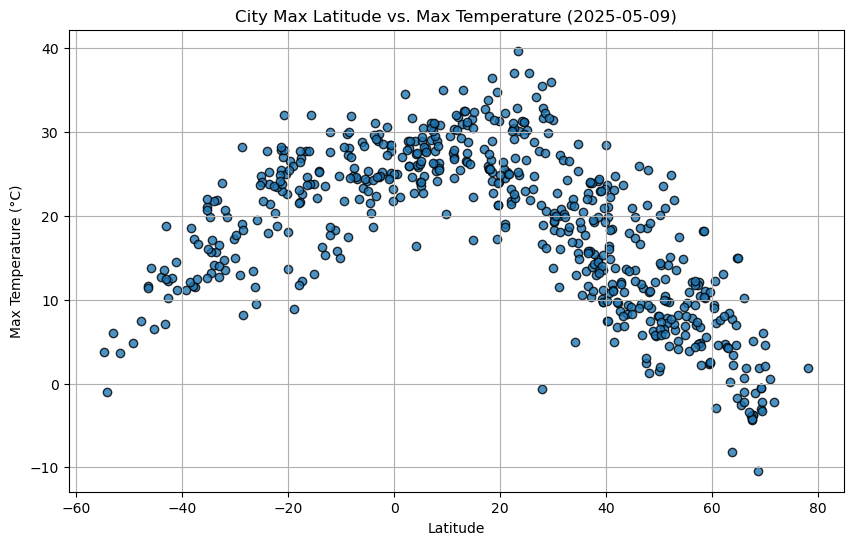

In [26]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. max temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2025-05-09)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

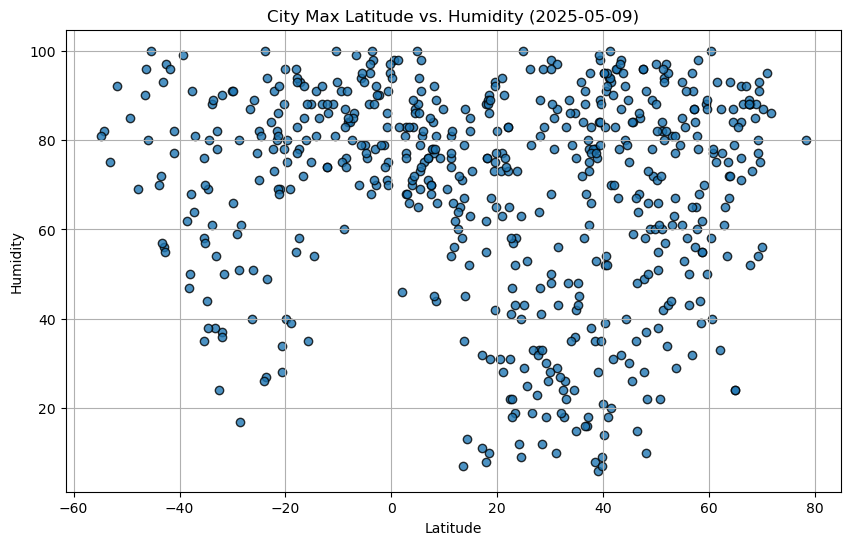

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2025-05-09)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

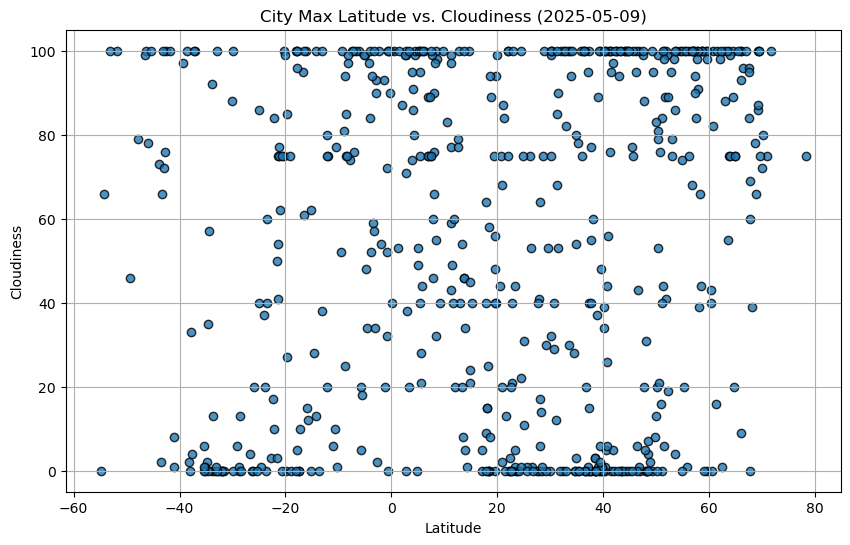

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2025-05-09)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

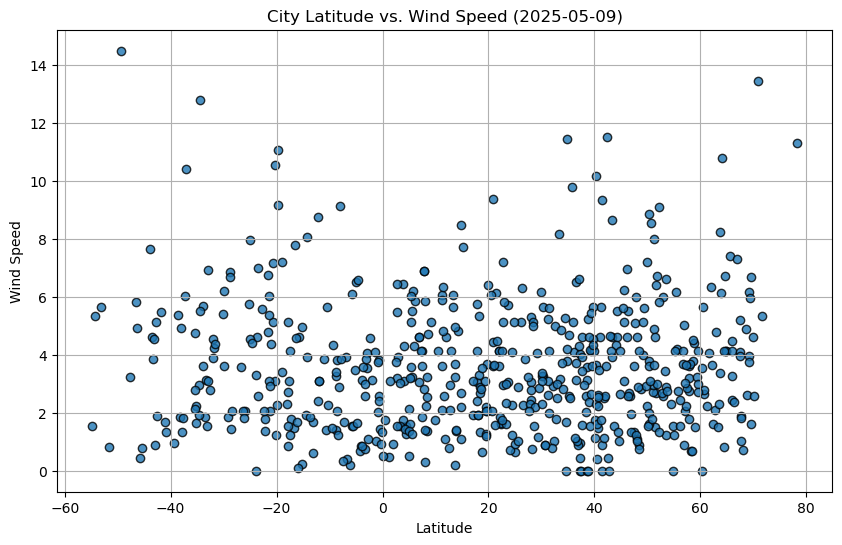

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-05-09)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


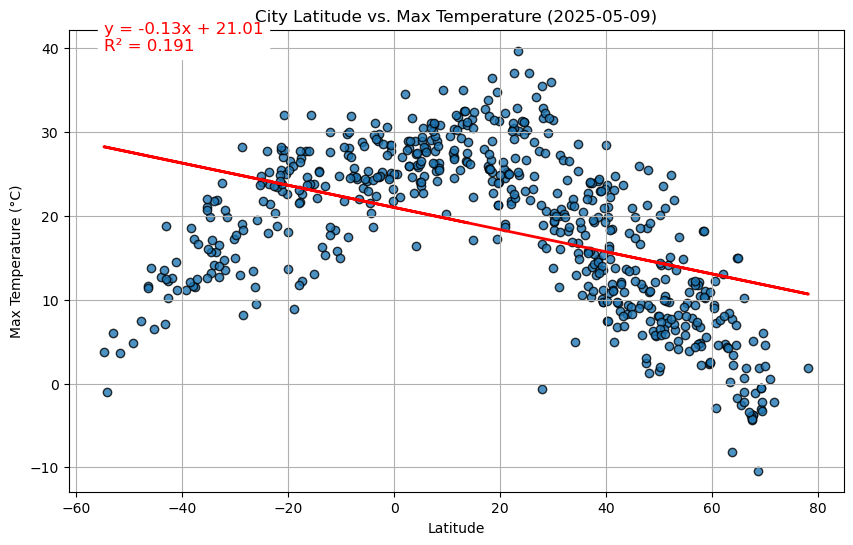

In [39]:


# Extract x and y values
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared = f"R² = {r_value**2:.3f}"

# Build scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Plot regression line
plt.plot(x_values, regress_values, color="red", linewidth=2)

# Add annotation
plt.annotate(f"{line_eq}\n{r_squared}",
             xy=(x_values.min(), y_values.max()),
             fontsize=12, color="red", backgroundcolor="white")

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (2025-05-09)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,11.82,94,100,4.63,US,1746853758
1,thompson,55.7435,-97.8558,3.90,58,1,2.75,CA,1746853759
5,al manshah,26.4769,31.8035,28.86,19,1,2.27,EG,1746853764
7,lucea,18.4510,-78.1736,25.27,86,58,2.67,JM,1746853766
9,bilibino,68.0546,166.4372,-1.15,73,39,0.72,RU,1746853768


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port mathurin,-19.6833,63.4167,26.52,80,27,9.17,MU,1746853761
3,waitangi,-43.9535,-176.5597,12.75,70,73,7.65,NZ,1746853762
4,manokwari,-0.8667,134.0833,28.43,71,72,2.02,ID,1746853763
6,saint-philippe,-21.3585,55.7679,25.45,86,54,6.02,RE,1746853765
8,blackmans bay,-43.0167,147.3167,18.74,56,72,0.89,AU,1746853767


###  Temperature vs. Latitude Linear Regression Plot

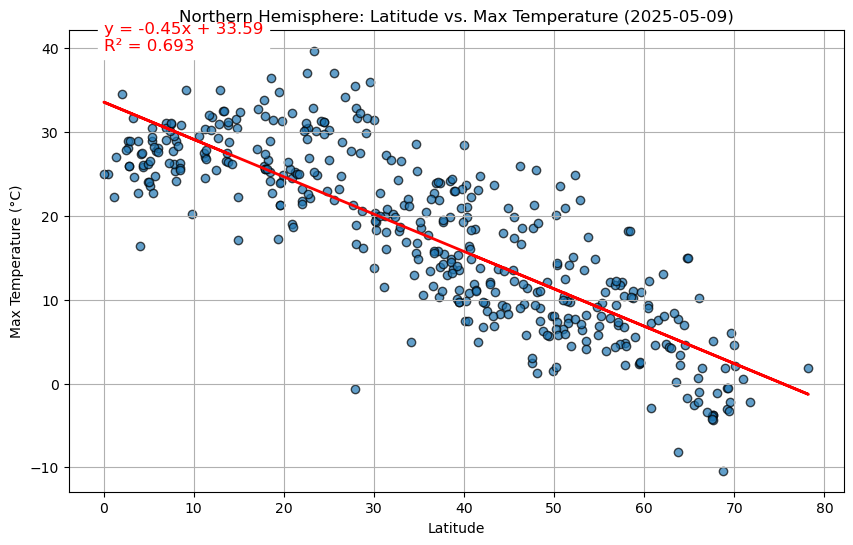

In [40]:
# Linear regression on Northern Hemisphere: Latitude vs. Max Temperature
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (°C)",
    title="Northern Hemisphere: Latitude vs. Max Temperature (2025-05-09)",
    save_path="output_data/Northern_Hemisphere_Lat_vs_Temp.png"
)

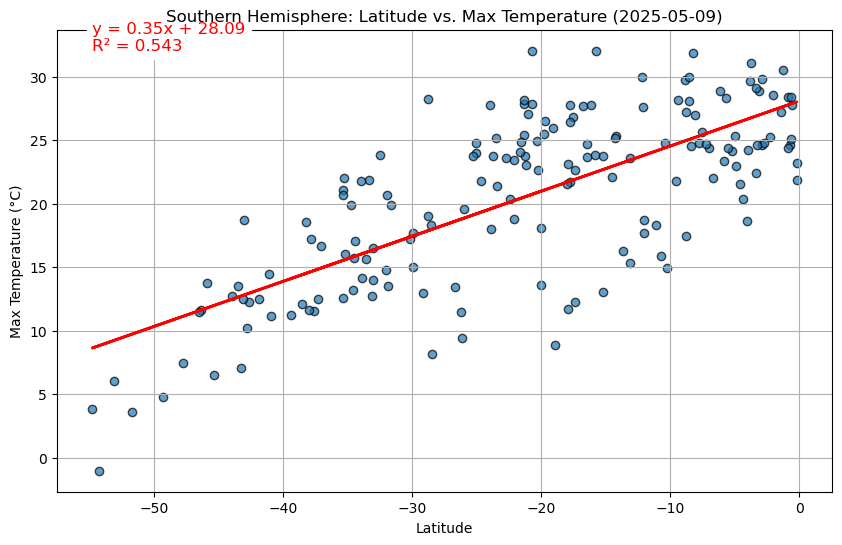

In [42]:
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (°C)",
    title="Southern Hemisphere: Latitude vs. Max Temperature (2025-05-09)",
    save_path="output_data/Southern_Hemisphere_Lat_vs_Temp.png"
)

**Discussion about the linear relationship:** In the northern hemisphere, as latitude increases, temperature decreases
In the southern hemisphere, as lattude increases, temperature increases. This supports the theory that the hottest weather in towards the equator. 

### Humidity vs. Latitude Linear Regression Plot

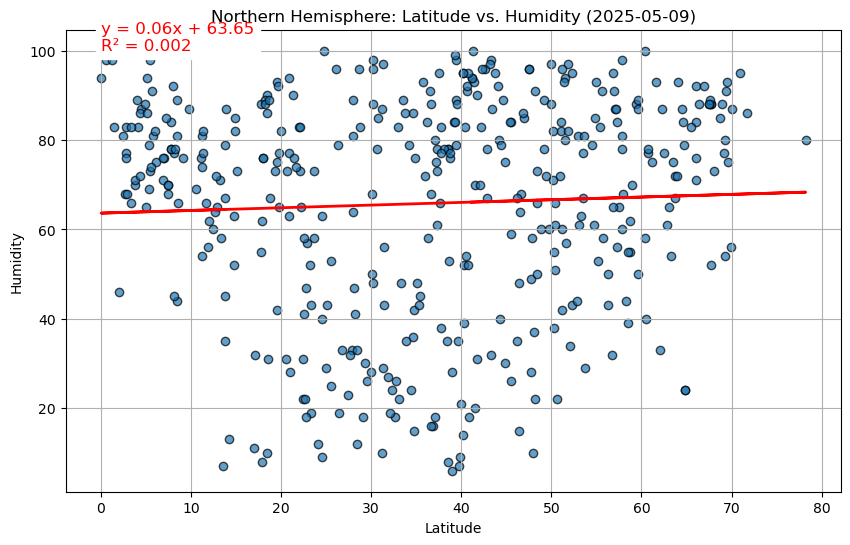

In [44]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Northern Hemisphere: Latitude vs. Humidity (2025-05-09)",
    save_path="output_data/Northern_Hemisphere_Lat_vs_Humidity.png"
)

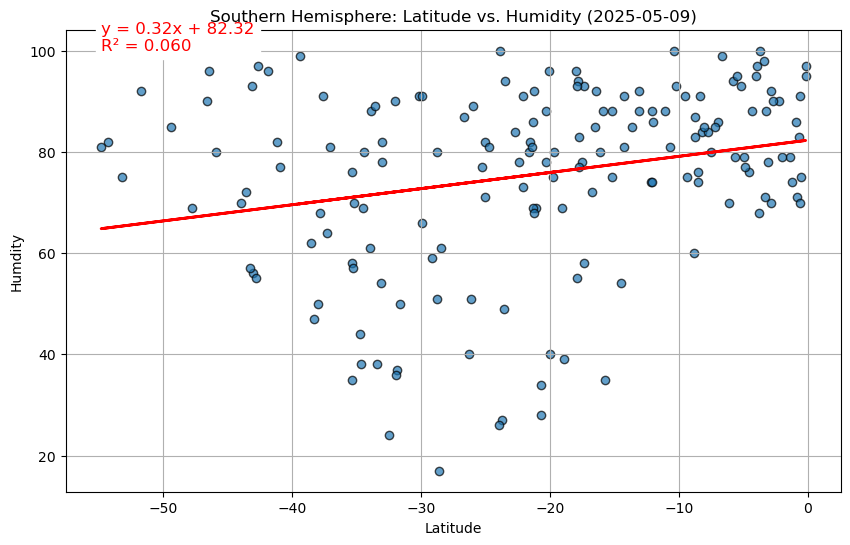

In [47]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humdity",
    title="Southern Hemisphere: Latitude vs. Humidity (2025-05-09)",
    save_path="output_data/Southern_Hemisphere_Lat_vs_Humidity.png"
)

**Discussion about the linear relationship:** In the northern hemisphere, as latitude increases, humidity increases slightly
In the southern hemisphere, as the latitude increases, humidity increases. There is not enough variation to declare a correlation so the data is nonlinear. 

### Cloudiness vs. Latitude Linear Regression Plot

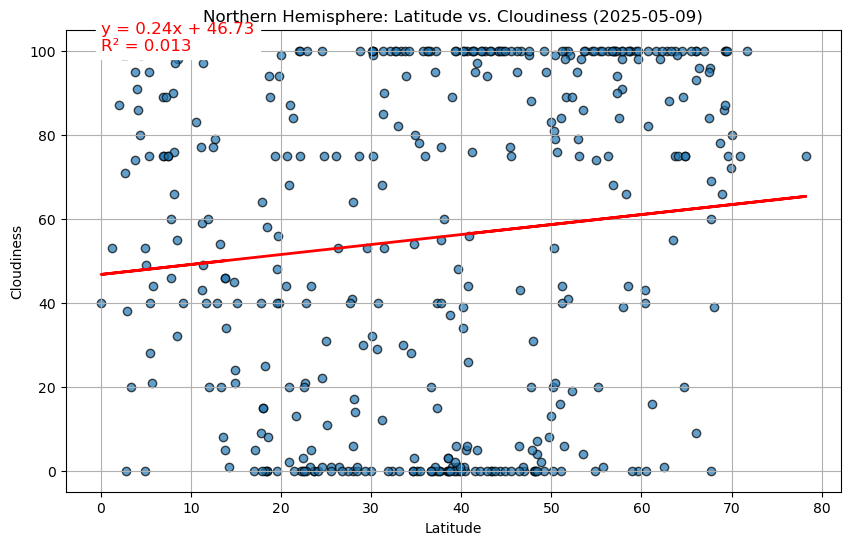

In [48]:
# Northern Hemisphere

plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Northern Hemisphere: Latitude vs. Cloudiness (2025-05-09)",
    save_path="output_data/Northern_Hemisphere_Lat_vs_Cloudiness.png"
)

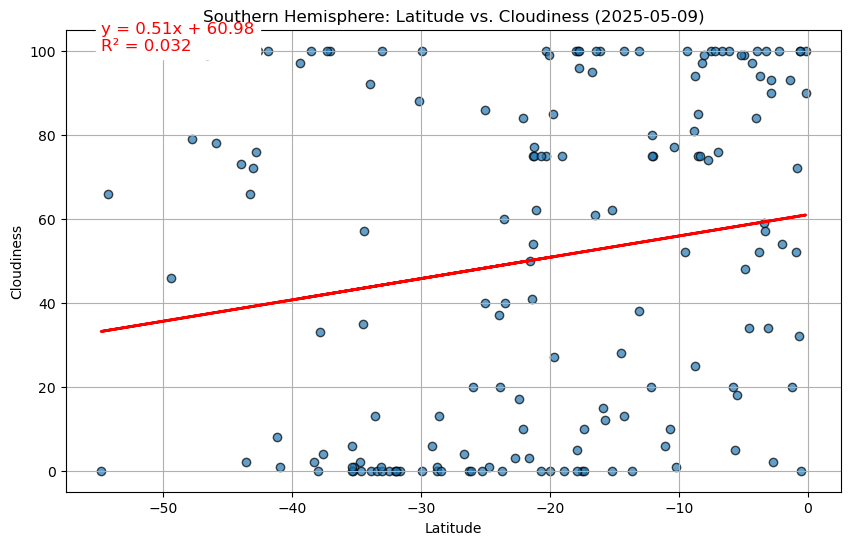

In [49]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Southern Hemisphere: Latitude vs. Cloudiness (2025-05-09)",
    save_path="output_data/Southern_Hemisphere_Lat_vs_Cloudiness.png"
)

**Discussion about the linear relationship:** When analyzing cloudiness and latitude, there is still not enough of a relationship to determine a correlation betweek latitude and cloudiness. This is also supported by the facr that R^2 is close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

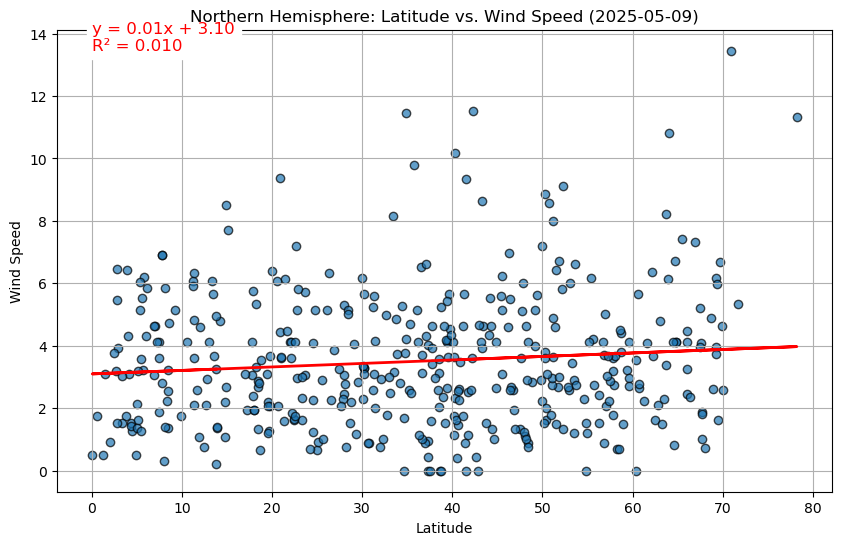

In [51]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Northern Hemisphere: Latitude vs. Wind Speed (2025-05-09)",
    save_path="output_data/Northern_Hemisphere_Lat_vs_Wind_Speed.png"
)

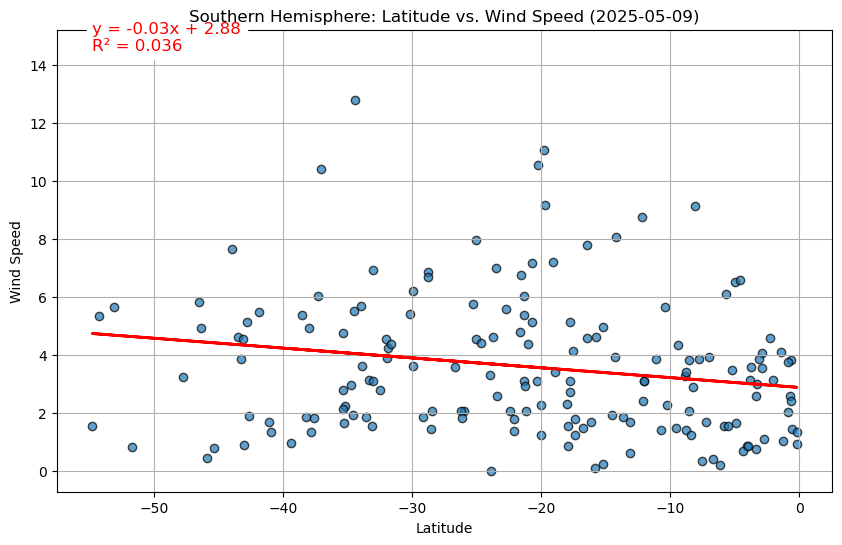

In [52]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Southern Hemisphere: Latitude vs. Wind Speed (2025-05-09)",
    save_path="output_data/Southern_Hemisphere_Lat_vs_Wind_Speed.png"
)

**Discussion about the linear relationship:** Again, the data proves inconclusive as to whether there is a strong relationship between latitude and wind speed.